In [1]:
## NOTE: This script will analyze the video to determine if it is
#        black and white or color, and deletes the original video after processing.
# MAKE A COPY OF YOUR ORIGINAL DATA

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
import cv2
import numpy as np

# Initialize global counters
bw_count = 0
color_count = 0

def is_black_and_white(video_path):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sampled_frames = np.linspace(0, total_frames - 1, 10).astype(int)

    for frame_index in sampled_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if not ret:
            continue

        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        _, saturation, _ = cv2.split(hsv_frame)

        if np.mean(saturation) > 25:
            cap.release()
            return False

    cap.release()
    return True

def process_video(video_path):
    global bw_count, color_count
    
    if is_black_and_white(video_path):
        bw_count += 1
    else:
        color_count += 1
    
    os.remove(video_path)

def process_folder(base_folder):
    global bw_count, color_count
    
    bw_count, color_count = 0, 0
    subdirectories = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(base_folder, subdirectory)
        files = os.listdir(subdirectory_path)

        for file in files:
            if file.endswith(".avi"):
                video_path = os.path.join(subdirectory_path, file)
                process_video(video_path)
    
    return {"Black and White": bw_count, "Color": color_count}

def main(dataset_directory):
    train_results = process_folder(os.path.join(dataset_directory, "train"))
    print(f"Training results: {train_results}")
    
    validation_results = process_folder(os.path.join(dataset_directory, "val"))
    print(f"Validation results: {validation_results}")
    
    return {
        "Train": train_results,
        "Validation": validation_results
    }

# Define the directory path
dir = r"D:\Main Project\Hockey data\HockeyFightOriginalCopy"

# Call the main function and capture results
data = main(dir)


Training results: {'Black and White': 274, 'Color': 526}
Validation results: {'Black and White': 47, 'Color': 153}


Processed folder: D:\Main Project\Hockey data\HockeyFightOriginalCopy/train

Black and White Videos: 274

Color Videos: 526

Processed folder: D:\Main Project\Hockey data\HockeyFightOriginalCopy/val

Black and White Videos: 47

Color Videos: 153

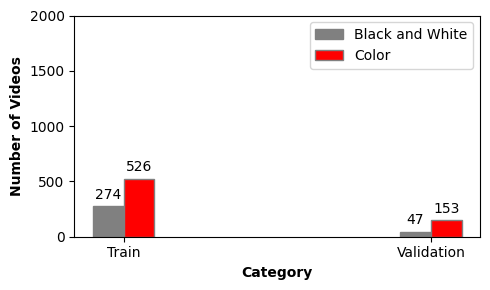

In [4]:
# # Data from the output
# data = {
#     "Train": {"Black and White": 255, "Color": 1345},
#     "Validation": {"Black and White": 41, "Color": 359}
# }

# Create lists for plotting
categories = list(data.keys())
bw_counts = [data[category]["Black and White"] for category in categories]
color_counts = [data[category]["Color"] for category in categories]

# Plotting
fig, ax = plt.subplots(figsize=(5, 3))

# Reduced bar width and adjusted positions closer together
barWidth = 0.1
r1 = np.arange(len(categories))
r2 = [x + barWidth for x in r1]

# Make the plot
bars1 = ax.bar(r1, bw_counts, color='gray', width=barWidth, edgecolor='grey', label='Black and White')
bars2 = ax.bar(r2, color_counts, color='red', width=barWidth, edgecolor='grey', label='Color')

# Add counts above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Adjust x-axis labels closer
ax.set_xticks(r1 + barWidth/2)
ax.set_xticklabels(categories)

# Setting plot details
ax.set_ylim(0, 2000)
ax.set_xlabel('Category', fontweight='bold')
ax.set_ylabel('Number of Videos', fontweight='bold')
# ax.set_title('Black and White vs Color Videos in Dataset')

# Create legend & Show graphic
ax.legend()
plt.tight_layout()
plt.show()
